In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
# Instantiate dataset class and assign to object
iris = datasets.load_iris()

# Load features and target
# Take only 2 classes, and 2 features (sepal length/width)
X = iris.data[:-50, :2]
# For teaching the math rather than preprocessing techniques,
# we'll be using this simple scaling method. However, you must
# be cautious to scale your training/testing sets subsequently.
X = preprocessing.scale(X)
y = iris.target[:-50] 

In [ ]:
# 50 of each iris flower
print(Counter(y))

# Type of flower
print(list(iris.target_names[:-1]))

# Shape of features
print(X.shape)

Counter({0: 50, 1: 50})
['setosa', 'versicolor']
(100, 2)


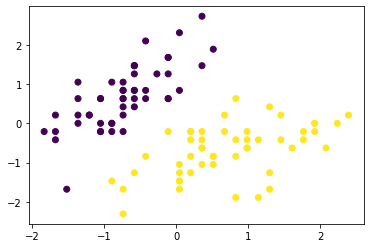

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'X train size: {X_train.shape}')
print(f'X test size: {X_test.shape}')
print(f'y train size: {y_train.shape}')
print(f'y test size: {y_test.shape}')

# Distribution of both classes are roughly equal using train_test_split function
print(Counter(y_train))

X train size: (80, 2)
X test size: (20, 2)
y train size: (80,)
y test size: (20,)
Counter({0: 41, 1: 39})


In [ ]:
num_epochs=10

In [ ]:
learning_rate = 0.1
num_features = X.shape[1]
weights = torch.zeros(num_features, 1, dtype=torch.float32)
bias = torch.zeros(1, dtype=torch.float32)

X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)

for epoch in range(num_epochs):        
    # 1. Forwardpropagation:
    # 1a. Affine Transformation: z = \theta x + b
    z = torch.add(torch.mm(X_train, weights), bias)
    # 2a. Sigmoid/Logistic Function: y_hat = 1 / (1 + e^{-z})
    y_hat = 1. / (1. + torch.exp(-z))

    # Backpropagation:
    # 1. Calculate binary cross entropy 
    l = torch.mm(-y_train.view(1, -1), torch.log(y_hat)) - torch.mm((1 - y_train).view(1, -1), torch.log(1 - y_hat))

    # 2. Calculate dl/dz
    dl_dz = y_train - y_hat.view(-1)

    # 2. Calculate partial derivative of cost w.r.t weights (gradients)
    # dl_dw = dl_dz dz_dw = (y_hat - y)(x^T)
    grad = torch.mm(X_train.transpose(0, 1), dl_dz.view(-1, 1))

    # Gradient descent:
    # update our weights and bias with our gradients
    weights += learning_rate * grad
    bias += learning_rate * torch.sum(dl_dz)

    # Accuracy
    total = y_hat.shape[0]
    predicted = (y_hat > 0.5).float().squeeze()
    correct = (predicted == y_train).sum()
    acc = 100 * correct / total 

    # Print accuracy and cost
    print(f'Epoch: {epoch} | Accuracy: {acc.item() :.4f} | Cost: {l.item() :.4f}')

print(f'Weights \n {weights.data}')
print(f'Bias \n {bias.data}')

Epoch: 0 | Accuracy: 51.2500 | Cost: 55.4518
Epoch: 1 | Accuracy: 98.7500 | Cost: 4.7067
Epoch: 2 | Accuracy: 100.0000 | Cost: 4.1929
Epoch: 3 | Accuracy: 100.0000 | Cost: 3.8130
Epoch: 4 | Accuracy: 100.0000 | Cost: 3.5165
Epoch: 5 | Accuracy: 100.0000 | Cost: 3.2762
Epoch: 6 | Accuracy: 100.0000 | Cost: 3.0759
Epoch: 7 | Accuracy: 100.0000 | Cost: 2.9053
Epoch: 8 | Accuracy: 100.0000 | Cost: 2.7576
Epoch: 9 | Accuracy: 100.0000 | Cost: 2.6280
Weights 
 tensor([[ 4.1825],
        [-3.2213]])
Bias 
 tensor([0.2774])


In [ ]:
# Port to tensors
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

# 1. Forwardpropagation:
# 1a. Affine Transformation: z = ax + b
z = torch.add(torch.mm(X_test, weights), bias)
# 2a. Sigmoid/Logistic Function: y_hat = 1 / (1 + e^{-z})
y_hat = 1. / (1. + torch.exp(-z))

total = y_test.shape[0]
predicted = (y_hat > 0.5).float().squeeze()
correct = (predicted == y_test).sum()
acc = 100 * correct / total 

# Print accuracy
print(f'Validation Accuracy: {acc.item() :.4f}')

Validation Accuracy: 100.0000
